# Totais de matrículas - Série Histórica

Pode ser que seu interesse, ao trabalhar com os microdados das matrículas, seja selecionar determinada série histórica.

Os arquivos utilizados podem ser acessados no [Portal de Dados Abertos](http://dados.prefeitura.sp.gov.br/dataset/microdados-da-rede-municipal-de-ensino-matriculas). 

É possível que você necessite de só alguns dos anos, ou um intervalo menor. Por isso, nem sempre é interessante trabalhar com a base completa -- as operações podem ficar muito lentas ou mesmo inviáveis, por insuficiência de memória.

[Saiba mais](https://github.com/prefeiturasp/dados-educacao/blob/master/README.md) sobre os tutoriais dos dados abertos da SME.

*Importante: também estamos aprendendo! Tem sugestões para melhorar os códigos? Não deixe de contribuir com este repositório :)*

## Bibliotecas do Python

A linguagem Python possui algumas bibliotecas úteis para trabalhar com grandes volumes e análises de dados. Neste caso, utilizaremos a biblioteca do Pandas e NumPy.

In [65]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

Trabalhamos aqui com os arquivos .csv disponíveis no Portal de Dados Abertos, já descompactados. Diferente do outro tutorial, porém, importaremos apenas algumas colunas (com que vamos trabalhar), para evitar insuficiência de memória. Dessa forma, iremos listar as colunas de interesse, para depois carregar os arquivos: 

In [3]:
anos = ['2009','2010', '2011', '2012', '2013', '2014', '2015', '2016']
#anos letivos que serão selecionados

colunas = ['AN_LETIVO', 'CD_ALUNO_SME', 'SITUACAO_MAT', 'MODALIDADE_SEGMENTO']
#variáveis que serão selecionadas

Um pouquinho de paciência para rodar o código abaixo (em especial com a quantidade de anos acima!)

In [4]:
df_mat_total = []

for ano in anos:

    matriculas = pd.read_csv('../Microdados_EOL_Matriculas_'+str(ano)+'.csv',
                             sep=';', encoding='ISO-8859-1', low_memory=False, usecols=colunas)
    #Lê o arquivo e transforma em DataFrame. 'usecols' serve como seletor de colunas do arquivo, com
    # as colunas selecionadas anteriormente.
    
    df_mat_total.append(matriculas)

df_mat_total = pd.concat(df_mat_total, axis=0, ignore_index=True)

Agora, iremos selecionar, com *filtros* a etapa escolar.

In [5]:
filtros = ['CRECHE', 'PRE', 'Fund1', 'Fund2']
#escolhendo algumas modalidades/segmentos específicos para totalizar

df_filtrada = df_mat_total[(df_mat_total.MODALIDADE_SEGMENTO.isin(filtros)) 
                           & (df_mat_total['SITUACAO_MAT'] == 'Concluido')]

Visualizando nosso conjunto de dados:

In [6]:
df_filtrada.tail()

,AN_LETIVO,MODALIDADE_SEGMENTO,CD_ALUNO_SME,SITUACAO_MAT
1769463,2010,PRE,4791973,Concluido
1769464,2010,PRE,4329083,Concluido
1769465,2010,PRE,4237516,Concluido
1769466,2010,PRE,4249441,Concluido
1769468,2010,CRECHE,4769915,Concluido


In [47]:
df_filtrada.shape
# verificando a dimensão da tabela filtrada 

(899790, 4)

Iremos selecionar e substituir os nomes das categorias para facilitar visualização.

In [61]:
df_filtrada['MODALIDADE_SEGMENTO'] = df_filtrada['MODALIDADE_SEGMENTO'].astype(CategoricalDtype(categories=['CRECHE', 'PRE', 'Fund1', 'Fund2']))


df_filtrada['MODALIDADE_SEGMENTO'] = df_filtrada['MODALIDADE_SEGMENTO'].cat.rename_categories(['Ed. Infantil - Creche', 'Ed. Infantil - Pré', 'Fundamental - Anos Iniciais', 'Fundamental - Anos Finais'])

/home/tuts/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/tuts/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [62]:
totaisAlunos = pd.pivot_table(df_filtrada, values='CD_ALUNO_SME',
                        index='AN_LETIVO',
                        columns='MODALIDADE_SEGMENTO',
                        aggfunc=np.count_nonzero)


Temos abaixo uma visualização do que filtrarmos até o momento.

In [63]:
totaisAlunos

MODALIDADE_SEGMENTO,Ed. Infantil - Creche,Ed. Infantil - Pré,Fundamental - Anos Iniciais,Fundamental - Anos Finais
AN_LETIVO,,,,
2010,130378,289531,233269,246612


Podemos visualizar pelo gráfico de barras, o número de alunos por etapa de ensino.
O código abaixo mostra o gráfico e ajusta o tamanho da imagem.

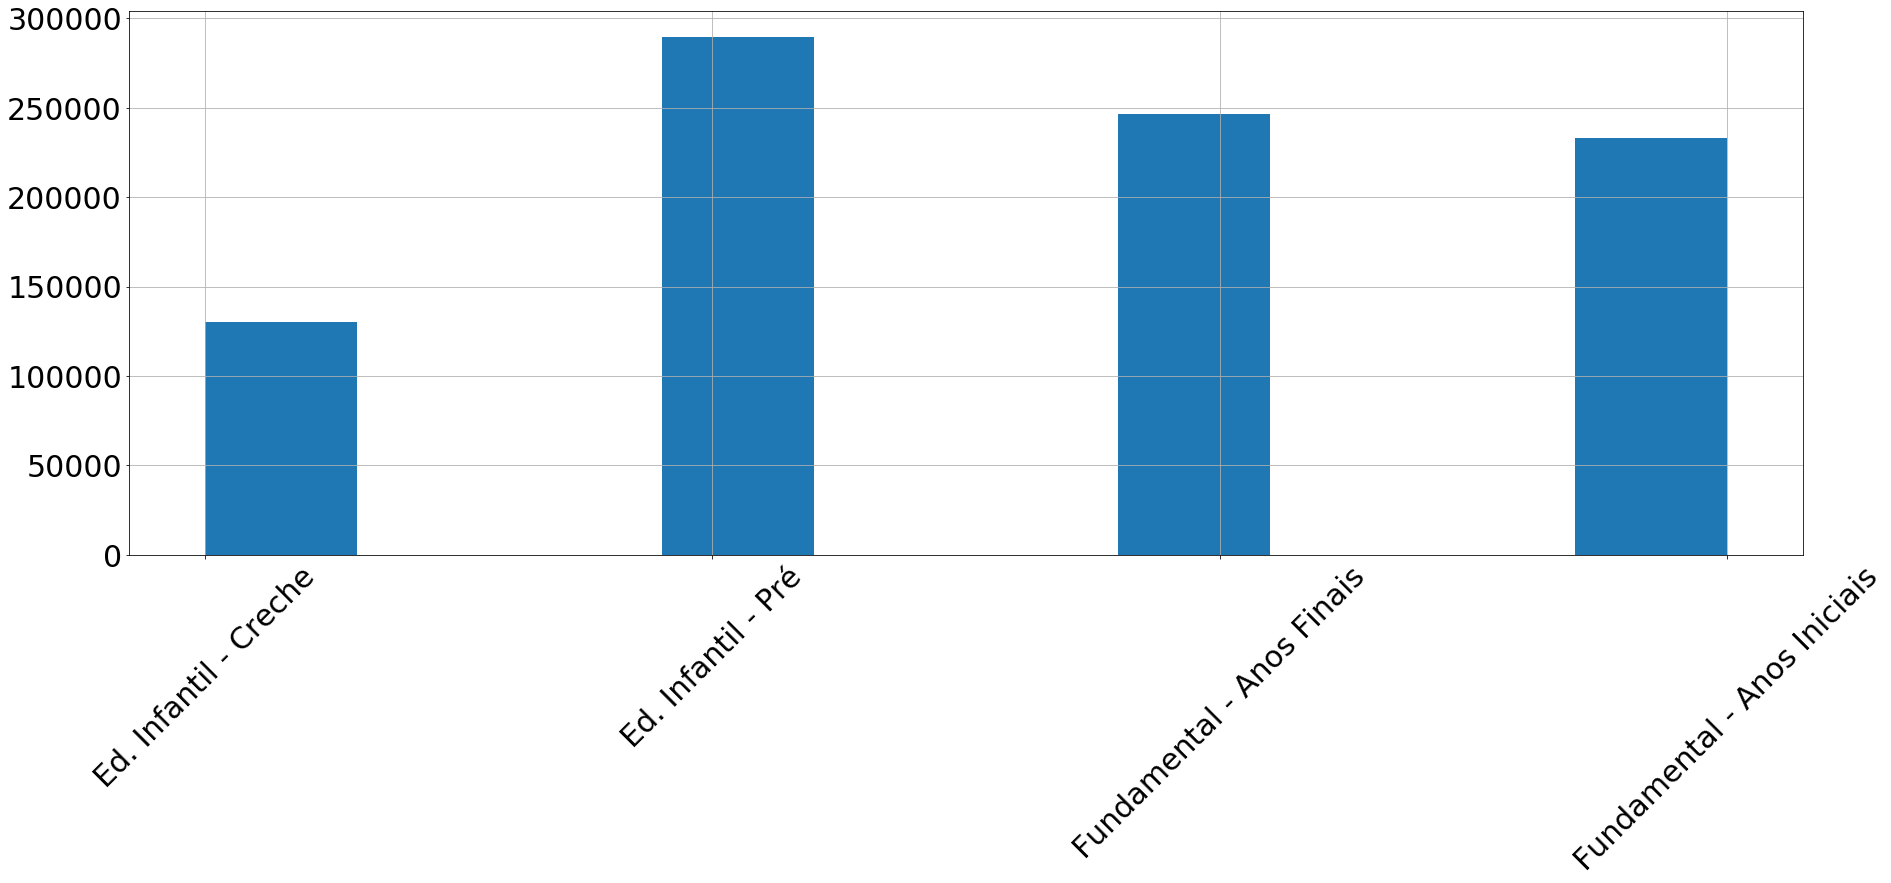

In [90]:
plt.figure(figsize=(30,10))
df_filtrada['MODALIDADE_SEGMENTO'].hist()
plt.yticks(fontsize=30)
plt.xticks(fontsize=30, rotation=45)
plt.show()

Para salvar em um arquivo .xlsx, usamos o comando abaixo.

In [ ]:
totais.to_excel('totais_Teste.xlsx')